In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent visual style for all plots
sns.set_theme(style="whitegrid")

# Define the file name
FILE_NAME = 'extractability_analysis_results_v7.csv'

In [2]:
try:
    # Load the dataset into a Pandas DataFrame
    df = pd.read_csv(FILE_NAME)
    print(f"✅ Successfully loaded data. Total repositories analyzed: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    
    # Display the first few rows to confirm structure
    display(df.head())
    
except FileNotFoundError:
    print(f"❌ Error: The file '{FILE_NAME}' was not found.")
    print("Please ensure the file is in the same directory as this notebook.")
except Exception as e:
    print(f"❌ An error occurred during file loading: {e}")

✅ Successfully loaded data. Total repositories analyzed: 74
Columns: 23


,repo_name,repo_url,total_files,total_python_files,internal_dependencies,external_dependencies,fundamental_ml_dependencies,cross_module_calls,coupling_score,cohesion_score,...,max_inheritance_depth,registry_pattern_usage,has_config_system,extractability_score,avg_file_complexity,max_file_complexity,total_classes,total_functions,analysis_status,error_message
0,facebookresearch/vissl,https://github.com/facebookresearch/vissl,2793,334,137,83,44,8653,0.255,0.495,...,2,172,True,38.60,17.39,174.0,390,2298,success,NaN
1,apple/corenet,https://github.com/apple/corenet,977,498,251,54,31,7819,0.359,0.493,...,2,283,True,27.26,12.27,224.0,405,2187,success,NaN
2,discovery-unicamp/Minerva,https://github.com/discovery-unicamp/Minerva,305,167,72,51,25,2774,0.313,0.204,...,2,3,True,53.27,12.86,124.0,234,1188,success,NaN
3,open-mmlab/mmsegmentation,https://github.com/open-mmlab/mmsegmentation,2241,1403,59,284,27,9902,0.256,0.455,...,1,258,True,31.77,3.43,256.0,425,1806,success,NaN
4,open-mmlab/mmdetection,https://github.com/open-mmlab/mmdetection,2857,1957,135,722,51,26081,0.284,0.744,...,2,596,True,30.89,7.21,329.0,1055,4747,success,NaN


In [3]:
print("--- Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics for Key Scores ---")
# Select the main numerical columns for a summary, focusing on the quality scores
key_scores = [
    'extractability_score', 
    'coupling_score', 
    'cohesion_score', 
    'modularity_score', 
    'complexity_score'
]

# Display descriptive statistics for easy interpretation
display(df[key_scores].describe().T)

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   repo_name                    74 non-null     object 
 1   repo_url                     74 non-null     object 
 2   total_files                  74 non-null     int64  
 3   total_python_files           74 non-null     int64  
 4   internal_dependencies        74 non-null     int64  
 5   external_dependencies        74 non-null     int64  
 6   fundamental_ml_dependencies  74 non-null     int64  
 7   cross_module_calls           74 non-null     int64  
 8   coupling_score               74 non-null     float64
 9   cohesion_score               74 non-null     float64
 10  modularity_score             74 non-null     float64
 11  complexity_score             74 non-null     float64
 12  dependency_depth             74 non-null     int64  

,count,mean,std,min,25%,50%,75%,max
extractability_score,74.0,38.249189,12.751607,0.0,31.20500,38.2250,46.79500,63.690
coupling_score,74.0,0.275959,0.106648,0.0,0.20650,0.2600,0.33150,0.672
cohesion_score,74.0,0.470662,0.196407,0.0,0.35625,0.4525,0.56025,1.000
modularity_score,74.0,0.459932,0.120402,0.0,0.42525,0.4750,0.52775,0.690
complexity_score,74.0,0.707243,0.152035,0.0,0.71775,0.7420,0.76200,0.806


Generating Plot 1: Distribution of Extractability Scores...
Generating Plot 2: Relationship between Extractability and Coupling...


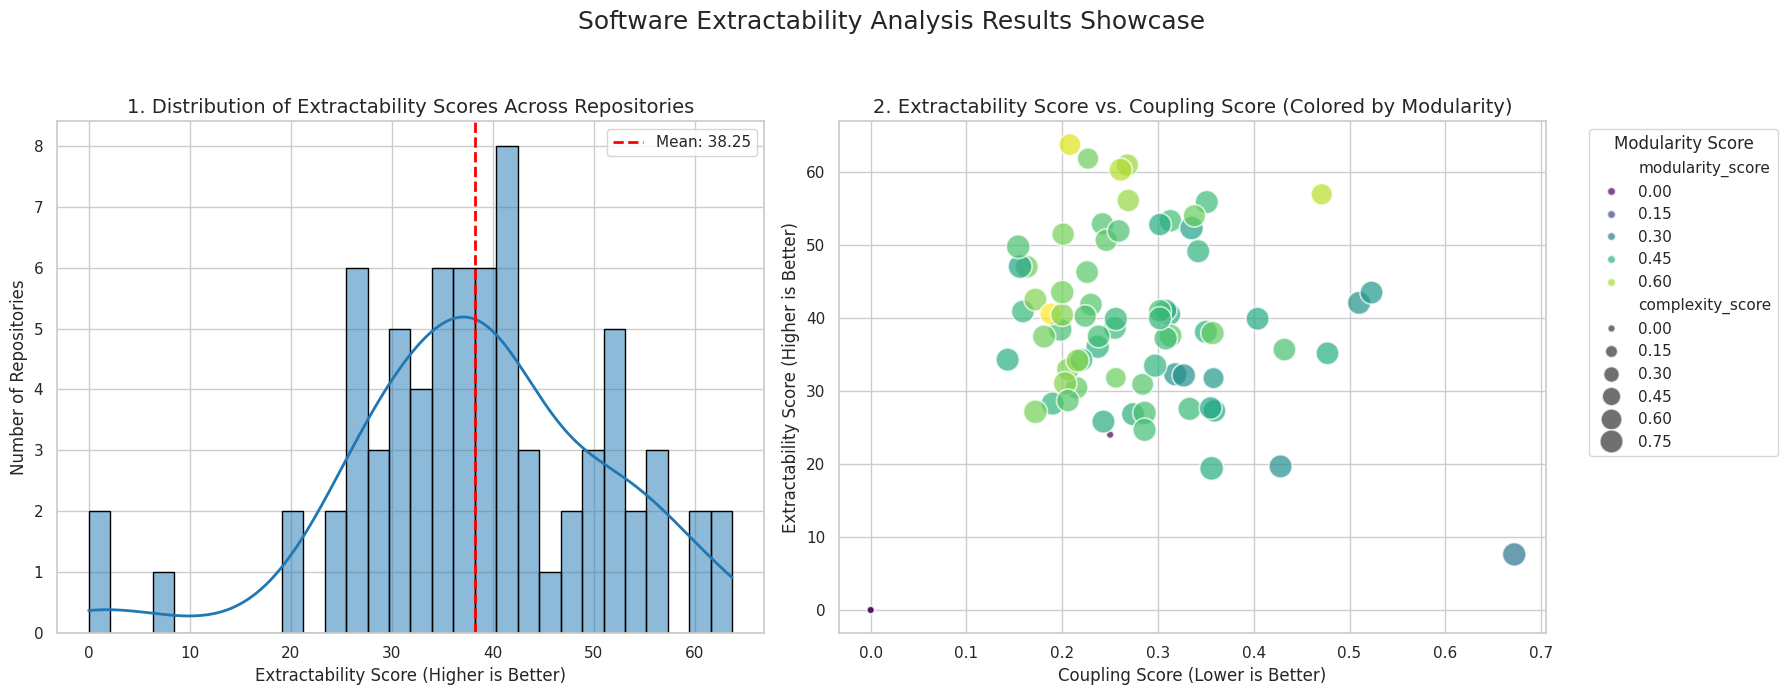

In [6]:
"""
## Visualization of Key Results

We will generate two core plots:
1.  **Distribution of Extractability Score:** To see the overall spread and central tendency of the main metric.
2.  **Extractability vs. Coupling/Modularity:** To investigate the relationships between core software quality metrics and the final extractability outcome.
"""

# Configure a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Software Extractability Analysis Results Showcase', fontsize=18, y=1.02)

# --- Cell 5: Plot 1 - Distribution of Extractability Score ---
print("Generating Plot 1: Distribution of Extractability Scores...")

# Histogram with Kernel Density Estimate (KDE) for smooth curve
sns.histplot(
    data=df,
    x='extractability_score',
    kde=True,
    bins=30, # Use 30 bins for detailed view
    ax=axes[0],
    color='#1f77b4', # Seaborn blue
    edgecolor='black',
    line_kws={'linewidth': 2}
)

# Add a line for the mean score
mean_score = df['extractability_score'].mean()
axes[0].axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_score:.2f}")

axes[0].set_title('1. Distribution of Extractability Scores Across Repositories', fontsize=14)
axes[0].set_xlabel('Extractability Score (Higher is Better)', fontsize=12)
axes[0].set_ylabel('Number of Repositories', fontsize=12)
axes[0].legend()

print("Generating Plot 2: Relationship between Extractability and Coupling...")

# Scatter plot to show correlation, using other scores for extra dimensions (hue, size)
sns.scatterplot(
    data=df,
    x='coupling_score', # Independent variable (often inversely related to extractability)
    y='extractability_score', # Dependent variable
    hue='modularity_score',  # Color points based on Modularity
    size='complexity_score', # Size points based on Complexity
    palette='viridis', # Colormap for 'hue'
    sizes=(30, 300), # Range of point sizes
    alpha=0.7, # Transparency
    ax=axes[1]
)

axes[1].set_title('2. Extractability Score vs. Coupling Score (Colored by Modularity)', fontsize=14)
axes[1].set_xlabel('Coupling Score (Lower is Better)', fontsize=12)
axes[1].set_ylabel('Extractability Score (Higher is Better)', fontsize=12)
# Move the legend outside the plot for better clarity
axes[1].legend(title='Modularity Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent subplot overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

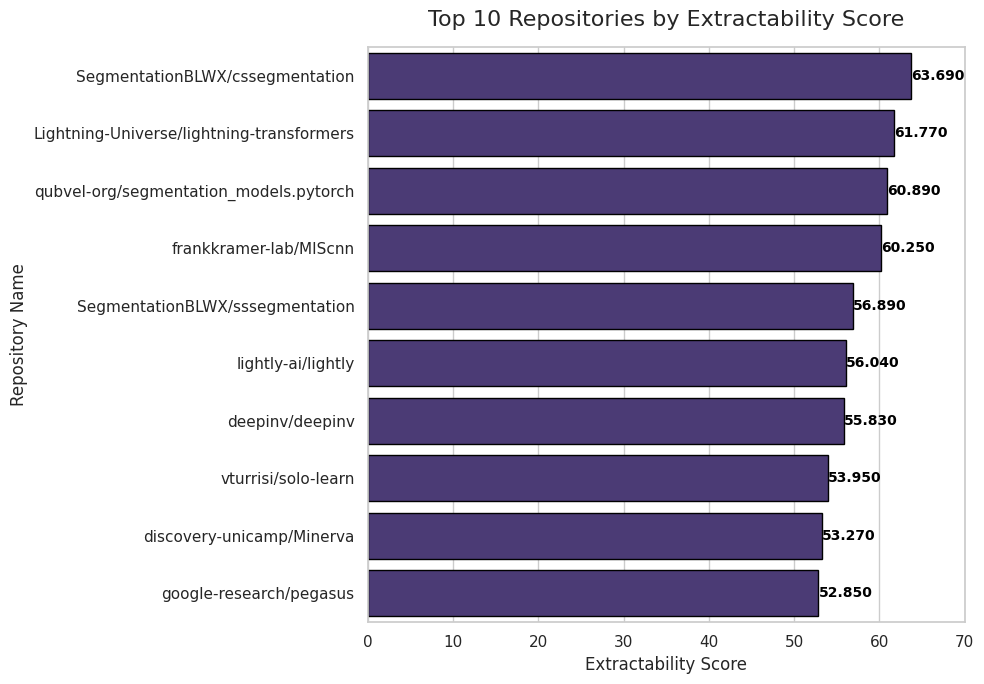

In [9]:
TOP_N_REPOS = 10
SCORE_COLUMN = 'extractability_score'
NAME_COLUMN = 'repo_name'

df_top = df.sort_values(
    by=SCORE_COLUMN, 
    ascending=False
).head(TOP_N_REPOS).copy()

# 2. Configure Plot
plt.figure(figsize=(10, 7))
sns.set_palette("viridis") # Set a specific, high-contrast palette

# 3. Create Bar Plot
ax = sns.barplot(
    data=df_top, 
    x=SCORE_COLUMN, 
    y=NAME_COLUMN, 
    edgecolor='black',
    linewidth=1
)

# 4. Add Annotations (Scores) to the bars
for i, row in df_top.iterrows():
    # Place text slightly after the end of the bar
    ax.text(
        row[SCORE_COLUMN] + 0.01, # x position (score + small offset)
        df_top.index.get_loc(i), # y position (index of the row in the displayed DataFrame)
        f"{row[SCORE_COLUMN]:.3f}", # text label
        color='black', 
        ha="left", 
        va="center",
        fontsize=10,
        fontweight='bold'
    )

# 5. Final Styling
plt.title(f'Top {TOP_N_REPOS} Repositories by {SCORE_COLUMN.replace("_", " ").title()}', 
            fontsize=16, pad=15)
plt.xlabel(SCORE_COLUMN.replace("_", " ").title(), fontsize=12)
plt.ylabel('Repository Name', fontsize=12)

# Adjust x-limit for labels to fit
max_score = df_top[SCORE_COLUMN].max()
plt.xlim(right=max_score * 1.1) 

plt.tight_layout()
plt.show()

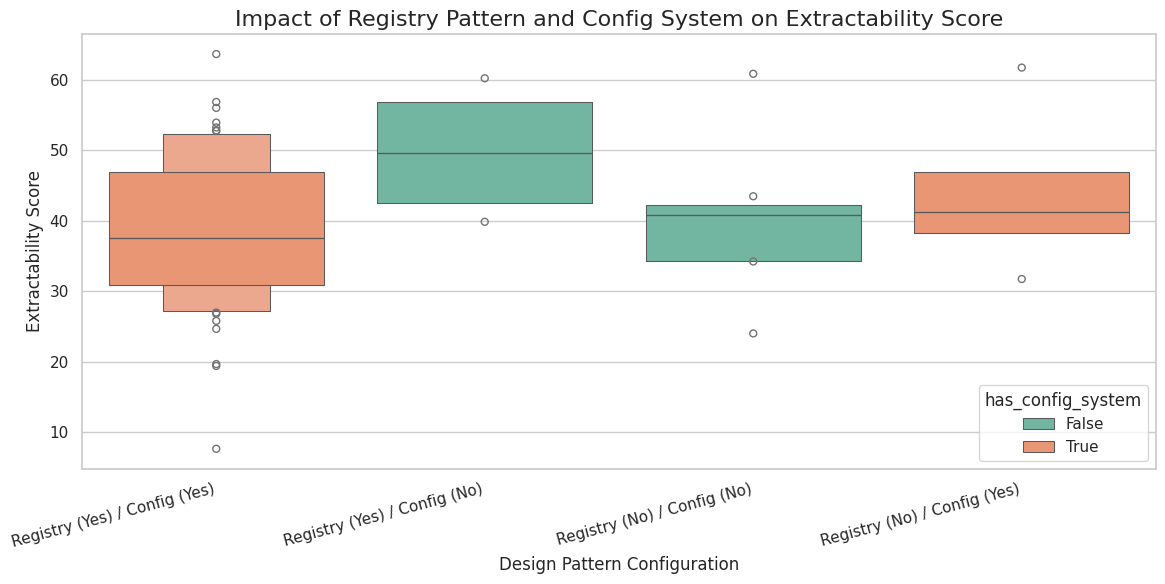

In [10]:
df_plot = df[df['analysis_status'] == 'success'].copy()

# Create a combined category to analyze both factors at once
df_plot['Pattern_Category'] = df_plot.apply(
    lambda row: f"Registry ({'Yes' if row['registry_pattern_usage'] > 0 else 'No'}) / Config ({'Yes' if row['has_config_system'] else 'No'})",
    axis=1
)

plt.figure(figsize=(12, 6))

# Boxen plot is a good alternative to a box plot, showing more distribution detail
sns.boxenplot(
    data=df_plot,
    x='Pattern_Category',
    y='extractability_score',
    palette='Set2',
    hue='has_config_system',
    dodge=False, # Use the hue just for color differentiation
)

plt.title('Impact of Registry Pattern and Config System on Extractability Score', fontsize=16)
plt.xlabel('Design Pattern Configuration', fontsize=12)
plt.ylabel('Extractability Score', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

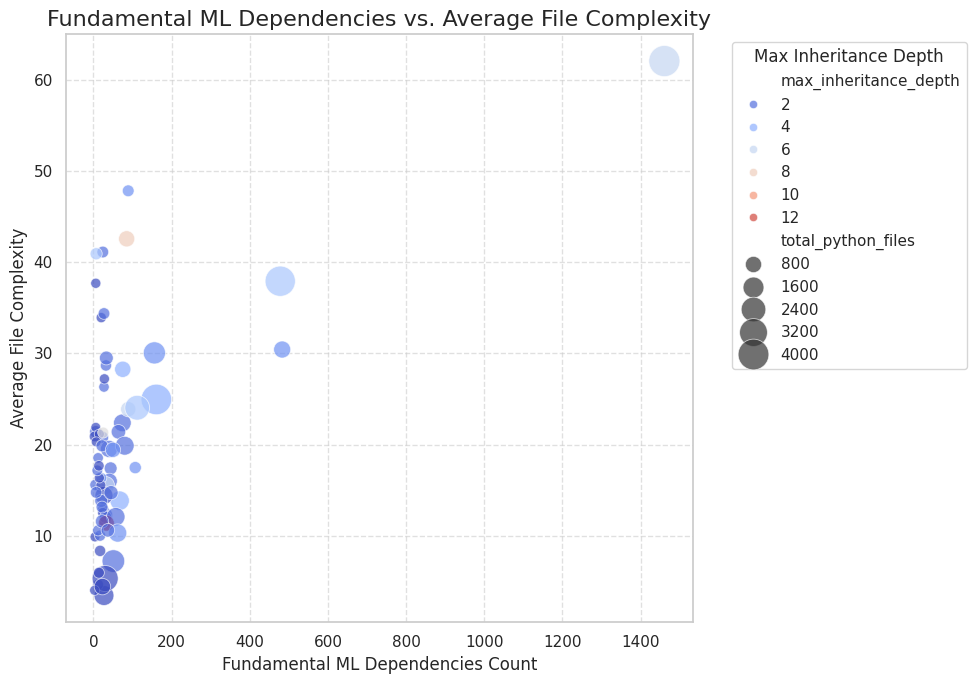

In [11]:
df_plot = df[
    (df['analysis_status'] == 'success') & 
    (df['fundamental_ml_dependencies'] > 0) &
    (df['avg_file_complexity'] < 100) # Remove massive outliers like Pytorch's 62.09 for better scaling
].copy()

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df_plot,
    x='fundamental_ml_dependencies',
    y='avg_file_complexity',
    hue='max_inheritance_depth', # Use max inheritance depth for color
    size='total_python_files', # Use total size for point size
    sizes=(50, 500),
    palette='coolwarm',
    alpha=0.7,
)

plt.title('Fundamental ML Dependencies vs. Average File Complexity', fontsize=16)
plt.xlabel('Fundamental ML Dependencies Count', fontsize=12)
plt.ylabel('Average File Complexity', fontsize=12)
plt.legend(title='Max Inheritance Depth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()